### 9.2. Predicting Stock Market Prices with LSTM using TensorFlow 2.0

In [ ]:
pip install --upgrade tensorflow

     |███▉                            | 37.9MB 51.2MB/s eta 0:00:06ERROR: Exception:
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/pip/_vendor/urllib3/response.py", line 425, in _error_catcher
    yield
  File "/usr/local/lib/python3.6/dist-packages/pip/_vendor/urllib3/response.py", line 507, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "/usr/local/lib/python3.6/dist-packages/pip/_vendor/cachecontrol/filewrapper.py", line 62, in read
    data = self.__fp.read(amt)
  File "/usr/lib/python3.6/http/client.py", line 459, in read
    n = self.readinto(b)
  File "/usr/lib/python3.6/http/client.py", line 503, in readinto
    n = self.fp.readinto(b)
  File "/usr/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b)
  File "/usr/lib/python3.6/ssl.py", line 1012, in recv_into
    return self.read(nbytes, buffer)
  File "/usr/lib/python3.6/ssl.py", line 874, in read
    return self._sslobj.read(len, buffer)

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [ ]:
# mounting google drive
from google.colab import drive
drive.mount('/gdrive')


Mounted at /gdrive


In [ ]:
# importing libraries
import pandas as pd
import numpy as np

#importing dataset
fb_complete_data = pd.read_csv("/gdrive/My Drive/datasets/fb_train.csv")

In [ ]:
#printing dataset header
fb_complete_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,78.580002,78.930000,77.699997,78.449997,78.449997,18177500
1,2015-01-05,77.980003,79.250000,76.860001,77.190002,77.190002,26452200
2,2015-01-06,77.230003,77.589996,75.360001,76.150002,76.150002,27399300
3,2015-01-07,76.760002,77.360001,75.820000,76.150002,76.150002,22045300
4,2015-01-08,76.739998,78.230003,76.080002,78.180000,78.180000,23961000


In [ ]:
#filtering open column
fb_training_processed = fb_complete_data[['Open']].values

In [ ]:
#scaling features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

fb_training_scaled = scaler.fit_transform(fb_training_processed)

In [ ]:
len(fb_training_scaled)

1257

In [ ]:
#training features containd data of last 60 days
#training labels contain data of 61st day

fb_training_features= []
fb_training_labels = []
for i in range(60, len(fb_training_scaled)):
    fb_training_features.append(fb_training_scaled[i-60:i, 0])
    fb_training_labels.append(fb_training_scaled[i, 0])

In [ ]:
#converting training data to numpy arrays
X_train = np.array(fb_training_features)
y_train = np.array(fb_training_labels)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(1197, 60)
(1197,)


In [ ]:
#converting data into 3D shape
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Activation, Dense, Flatten, Dropout,  Flatten, LSTM
from tensorflow.keras.models import Model

In [ ]:
#defining the LSTM network

input_layer = Input(shape = (X_train.shape[1], 1))
lstm1 = LSTM(100, activation='relu', return_sequences=True)(input_layer)
do1 = Dropout(0.2)(lstm1)
lstm2 = LSTM(100, activation='relu', return_sequences=True)(do1)
do2 = Dropout(0.2)(lstm2)
lstm3 = LSTM(100, activation='relu', return_sequences=True)(do2)
do3 = Dropout(0.2)(lstm3)
lstm4 = LSTM(100, activation='relu')(do3)
do4 = Dropout(0.2)(lstm4)

output_layer = Dense(1)(do4)
model = Model(input_layer, output_layer)
model.compile(optimizer='adam', loss='mse')

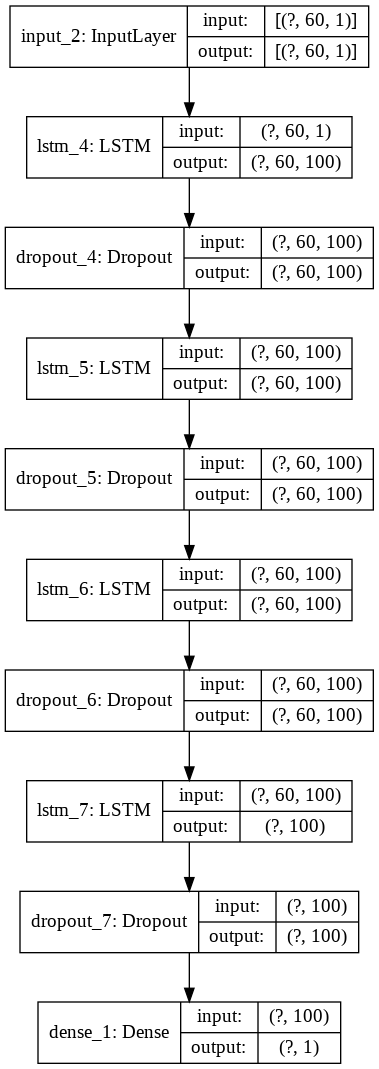

In [ ]:
#plotting model architecture
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='/gdrive/My Drive/datasets/model_plot1.png', show_shapes=True, show_layer_names=True)

In [ ]:
print(X_train.shape)
print(y_train.shape)
y_train= y_train.reshape(-1,1)
print(y_train.shape)

(1197, 60, 1)
(1197,)
(1197, 1)


In [ ]:
#training the model
model_history = model.fit(X_train, y_train, epochs=100, verbose=1, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 18s 469ms/step - loss: 0.0740
Epoch 2/100
38/38 [==============================] - 18s 464ms/step - loss: 0.0085
Epoch 3/100
38/38 [==============================] - 18s 466ms/step - loss: 0.0067
Epoch 4/100
38/38 [==============================] - 18s 483ms/step - loss: 0.0062
Epoch 5/100
38/38 [==============================] - 18s 473ms/step - loss: 0.0059
Epoch 6/100
38/38 [==============================] - 18s 482ms/step - loss: 0.0060
Epoch 7/100
38/38 [==============================] - 18s 471ms/step - loss: 0.0053
Epoch 8/100
38/38 [==============================] - 17s 458ms/step - loss: 0.0052
Epoch 9/100
38/38 [==============================] - 18s 461ms/step - loss: 0.0053
Epoch 10/100
38/38 [==============================] - 18s 467ms/step - loss: 0.0048
Epoch 11/100
38/38 [==============================] - 18s 474ms/step - loss: 0.0050
Epoch 12/100
38/38 [==============================] - 18s 472ms/step - loss: 0.0046
E

In [ ]:
#creating test set
fb_testing_complete_data = pd.read_csv("/gdrive/My Drive/datasets/fb_test.csv")
fb_testing_processed = fb_testing_complete_data[['Open']].values




In [ ]:
fb_all_data = pd.concat((fb_complete_data['Open'], fb_testing_complete_data['Open']), axis=0)

In [ ]:
test_inputs = fb_all_data [len(fb_all_data ) - len(fb_testing_complete_data) - 60:].values
print(test_inputs.shape)


(80,)


In [ ]:
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)
print(test_inputs.shape)

(80, 1)


In [ ]:
fb_test_features = []
for i in range(60, 80):
    fb_test_features.append(test_inputs[i-60:i, 0])

In [ ]:
X_test = np.array(fb_test_features)
print(X_test.shape)

(20, 60)


In [ ]:
#converting test data into 3D shape
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(20, 60, 1)


In [ ]:
#making predicitons on test set
y_pred =  model.predict(X_test)
print(y_pred.shape)

(20, 1)


In [ ]:
#converting scaled data back to original data
y_pred = scaler.inverse_transform(y_pred)

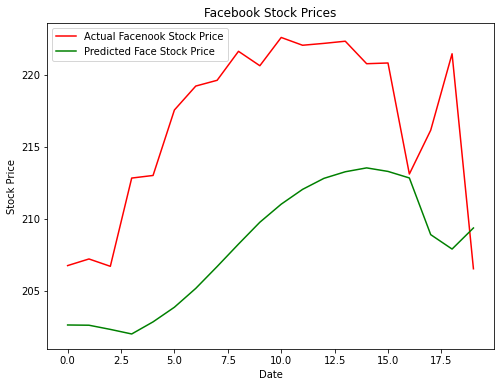

In [ ]:
#plotting original and predicted stock values
plt.figure(figsize=(8,6))
plt.plot(fb_testing_processed, color='red', label='Actual Facenook Stock Price')
plt.plot(y_pred , color='green', label='Predicted Face Stock Price')
plt.title('Facebook Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()